# Homework 2

The homework consists of two parts: theoretical part (5 pts) and coding part (25 pts).
 - All theoretical questions must be answered in your own words, do not copy-paste text from the internet.
 - You can get 5 pts for correctly answering theoretical questions; points can be deducted for terrible formatting or incomprehensible English.
 - Coding part gives maximum of 25 pts.
 - There are 3 tasks in theoretical part and 9 tasks in coding part. The tasks are indicated by **Task** followed by the task number.

*Once completed zip the entire directory containing this exercise and upload it to https://courses.cs.ut.ee/2019/nn/spring/Main/Practices.*

For background reading see http://cs231n.github.io/linear-classify/ and http://cs231n.github.io/optimization-1/.


## Part 1: Lecture Materials (5 pts)

These theoretical questions are about the material covered in the lecture about "Feed-forward Neural networks"

### Feed-forward Neural Networks

**Task 1.1: Logic gates (1pt)**
In the lecture you have seen how to construct `AND`, `OR` and `NOT` logic gates using the McCulloch-Pitts model of a neuron. Remember that:
```
 if sum(w.*x)<0, output is 0
 if sum(w.*x)>=0, output is 1 (notice that 0 is included)
```
 Your task is to construct one more logical operation using MP neurons - the `NAND` gate. Your response should contain an image (that you should draw yourself and not copy paste from the internet) similar to the images below:

<img src="./gates.png" width="250">


**Your Answer**: <img src="./Task1_1.png" width="650">

**Task 1.2: Perceptron (2pts)**
In the lecture you learned about the perceptron algorithm that dates back to the 1950-60ies. Using a perceptron would it be possible to learn a model that perfectly separates the two classes in each of the following two datasets:

**Dataset A:**

| Height | Weights | Label |
|--------|---------|-------|
| 25cm   | 5kg     | dog   |
| 22cm   | 3kg     | dog   |
| 24cm   | 3kg     | cat   |
| 23cm   | 5kg     | cat   |

**Dataset B:**

| Height | Weights | Label |
|--------|---------|-------|
| 25cm   | 5kg     | dog   |
| 24cm   | 6kg     | dog   |
| 23cm   | 4kg     | cat   |
| 24cm   | 5kg     | cat   |

For each dataset your response should state if perceptron can learn to separate the classes and if not, why. Feel free to add illustrations.

**Your Answer**: <img src="./Task1_2.png" width="650">
- For Dataset A, the perceptron will not be able to separate the classes. This is because the classes cannot be separated by a linear line as can be seen from the plot of the data distribution in the image above.
- For Dataset B, the perceptron will be able to separate the classes. This is possible as the distribution of the classes are such that a linear line can be drawn to neatly separate the classes as depicted in the image above.

**Task 1.3: Feed-forward neural network (2pts)**
Consider two fully-connected feed-forward neural networks that take as input 32x32 images with 3 color values per pixel. This input is flattened before being fed to the network (put into one long 1D vector). The networks' output consists of 10 probabilities corresponding to different object classes (thus performing object recognition). 

Network A has one hidden layer of size 1024. Network B has three hidden layers of size 512. 

Answer the following questions:
 - What is the length of the input vector?
 - What are the dimensions of the weight matrices of these networks? (you need to give 2 matrices for network A and 4 for network B) 
 - Which network has more parameters? Explain.

**Your Answer**: 
- The length of the input vector is the product of the dimensions of the image and the dimensions of color, i.e. $len(input) = 32\times32\times3 =3072$ 
- The dimenstions for the weight matrix for Network A is $[3072,1024]$ in the first layer and $[1024,10]$ for output layer. The dimensions for the weight matrix for Network B is $[3072,512]$ for the first layer and $[512,512]$ for subsequent layers until the output layer which has dimensions [512,10].
- Number of weights for $Network A = 3072\times1024 + 1024\times10 = 3155968$. Number of weights for $Network B = 3072\times512+2\times(512\times512)+(512\times10)=2102272$. So Network A has more parameters. 

## Part 2: Softmax exercise (25 pts)

In this exercise you will:

- implement a fully-vectorized **loss function** for the Softmax classifier
- implement the fully-vectorized expression for its **analytic gradient**
- **check your implementation** with numerical gradient
- **optimize** the loss function with **SGD**
- use a validation set to **tune the learning rate and regularization** strength
- **visualize** the final learned weights

### Theory

We have a linear classifier (you could also call it 1-layer neural network). Input to the network is vector $\mathbf{x}$ of $n$ features, output of the network is vector of $m$ class probablities $\mathbf{p}$. The target class $c$ is coded as one-hot vector $\mathbf{y}$ (meaning it has 1 at index $c$ and zeroes everywhere else). Weights of the network are represented by $n \times m$ matrix $\mathbf{W}$.

$$
\mathbf{x} = \begin{pmatrix} x_1\\ x_2\\ ..\\ x_n \end{pmatrix}
\qquad
\mathbf{p} = \begin{pmatrix} p_1\\ p_2\\ ..\\ p_m \end{pmatrix}
\qquad
\mathbf{y} = \begin{pmatrix} y_1\\ y_2\\ ..\\ y_m \end{pmatrix}
\qquad y_i = 
\begin{cases}
    1, &if\ \ i=c\\
    0, &otherwise
\end{cases}
\qquad
\mathbf{W} = \begin{pmatrix} w_{11}&w_{12}&..&w_{1m}\\w_{21}&w_{22}&..&w_{2m}\\..&..&..&..\\w_{n1}&w_{n2}&..&w_{nm} \end{pmatrix}
$$

Notice we are missing biases, but without a loss of generalization we can add another feature to the inputs which is always $1$ and this turns weights of this feature into biases. 

To train the network we use cross-entropy loss function and perform gradient descent with respect to weight matrix $\mathbf{W}$. Following represents step-by-step forward pass of the network, where $L$ is the loss function:

$$
\begin{align*}
\mathbf{z} &= \mathbf{x}^TW,\qquad\qquad z_j = \sum_{i=1}^n x_i W_{ij}
\\
\mathbf{p} &= softmax(\mathbf{z}),\qquad p_i = \frac{e^{z_i}}{\sum_{j=1}^m e^{z_j}}
\\
L &= -\sum_{i=1}^m y_i \log p_i = -\log p_c
\end{align*}
$$

To perform gradient descent we need the gradient of loss function with respect to the weights $\frac{\partial L}{\partial W_{ij}}$. This can be expressed with chain rule:

$$
%\frac{\partial L}{\partial \mathbf{W}} = \frac{\partial L}{\partial \mathbf{p}} \cdot \frac{\partial \mathbf{p}}{\partial \mathbf{z}} \cdot \frac{\partial \mathbf{z}}{\partial \mathbf{W}}
%\\
\frac{\partial L}{\partial W_{ij}} = \sum_{k=1}^{m} \sum_{l=1}^{m} \frac{\partial L}{\partial p_l} \frac{\partial p_l}{\partial z_k} \frac{\partial z_k}{\partial W_{ij}}
$$

Sum over $l$ and $k$ comes from the fact that $W_{ij}$ affects loss $L$ through multiple pathways through different $p_l$ and $z_k$. It is best imagined as a [computational graph](http://colah.github.io/posts/2015-08-Backprop/).

To compute the full gradient we need to produce three partial derivatives:

$$
\begin{align*}
\frac{\partial L}{\partial p_l} &= -y_l\frac{1}{p_l}
\\
\frac{\partial p_l}{\partial z_k} &=(1-p_k)\times p_k (when\ l=k);-p_k\times p_l (when\ l\neq k); 
\\
\frac{\partial z_k}{\partial W_{ij}} &= x_i(when\ j=k);\ 0(when\ j\neq k);  
\end{align*}
$$

**Task 2.1:** 
Derive the above gradients and fill the empty space above. You need to remember some classical calculus rules:
$$
(e^x)' = e^x
\qquad
(\log x)' = \frac{1}{x}
\qquad
(xy)' = x'y + x'y
\qquad
\left(\frac{x}{y}\right)' = \frac{x'y - y'x}{y^2}
$$

Putting everything together:

$$
\begin{align*}
\frac{\partial L}{\partial z_k} &= \sum_{l=1}^m \frac{\partial L}{\partial p_l} \frac{\partial p_l}{\partial z_k}= -\frac{y_k}{p_k} p_k (1-p_k) + \sum_{l\neq k}^m \frac{y_l}{p_l} p_l p_k = -y_k + y_k p_k + \sum_{l\neq k}^m y_l p_k  = -y_k + p_k \sum_{l=1}^m y_l= p_k-y_k
\\
\frac{\partial L}{\partial W_{ij}} &= \sum_{k=1}^m \frac{\partial L}{\partial z_k} \frac{\partial z_k}{\partial W_{ij}} = (p_j - y_j) x_i
\end{align*}
$$

To perform a gradient descent you need to subtract gradient from the weights (because we are minimizing the loss function):
$$
W_{ij} = W_{ij} - \alpha \frac{\partial L}{\partial W_{ij}}
$$

Here $\alpha$ is a learning rate that must be tuned manually.

In [1]:
from __future__ import print_function
import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt



%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## CIFAR-10 Data Loading and Preprocessing

In [2]:
# Load the raw CIFAR-10 data.
cifar10_dir = '../datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


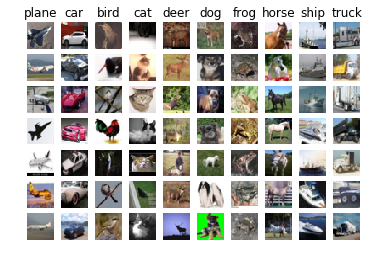

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [5]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


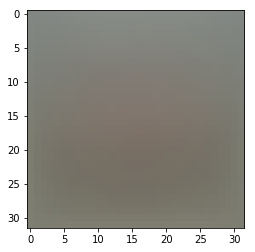

In [6]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()

In [7]:
# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [8]:
# third: append the bias dimension of ones (i.e. bias trick) so that our model
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


## Softmax Classifier

Your code for this section will all be written inside `softmax.py`.

**Task 2.2** First implement the naive softmax loss function with nested loops. Open the file `softmax.py` and implement the `softmax_loss_naive` function.


In [10]:
from softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.338583
sanity check: 2.302585


**Task 2.3** Why do we expect our loss to be close to $-\log(0.1)$? Explain briefly.

**Your answer:** We expect our loss to be close to -log(0.1) as there are 10 classes in the model and the loss should represent a uniform distribution. 

**Task 2.4** Complete the implementation of `softmax_loss_naive` and implement a (naive) version of the gradient that uses nested loops.

In [18]:
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# Use numeric gradient checking as a debugging tool.
# The numeric gradient should be close to the analytic gradient
# (relative error should be in the magnitude of 1e-8).
print("Without regularization:")
from gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# Do another gradient check with regularization.
print("With regularization:")
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

Without regularization:
numerical: -3.789324 analytic: -3.789324, relative error: 2.601445e-09
numerical: 1.535392 analytic: 1.535392, relative error: 6.301500e-10
numerical: -1.322656 analytic: -1.322656, relative error: 3.750112e-08
numerical: 1.526746 analytic: 1.526746, relative error: 7.092687e-08
numerical: 1.247886 analytic: 1.247885, relative error: 5.331266e-08
numerical: 1.099916 analytic: 1.099915, relative error: 9.431771e-08
numerical: 0.222819 analytic: 0.222819, relative error: 1.783433e-07
numerical: 1.284415 analytic: 1.284415, relative error: 1.480115e-08
numerical: -2.259741 analytic: -2.259741, relative error: 1.705163e-08
numerical: -4.071365 analytic: -4.071365, relative error: 1.682524e-08
With regularization:
numerical: 2.878748 analytic: 2.878748, relative error: 8.599205e-09
numerical: -2.355074 analytic: -2.355074, relative error: 3.901248e-08
numerical: -1.868620 analytic: -1.868620, relative error: 6.151745e-10
numerical: -3.309135 analytic: -3.309135, rela

**Task 2.5** Now that we have a naive implementation of the softmax loss function and its gradient, implement a vectorized version in `softmax_loss_vectorized`. The two versions should compute the same results, but the vectorized version should be much faster (around 10x).

In [17]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# We use the Frobenius norm to compare the two versions of the gradient.
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.338583e+00 computed in 0.211873s
vectorized loss: 2.338583e+00 computed in 0.009049s
Loss difference: 0.000000
Gradient difference: 0.000000


### Stochastic Gradient Descent

We now have vectorized and efficient expressions for the loss, the gradient and our gradient matches the numerical gradient. We are therefore ready to do SGD to minimize the loss.

**Task 2.6** In the file `linear_classifier.py`, implement SGD in the function `LinearClassifier.train()` and then run it with the code below.

In [18]:
from linear_classifier import Softmax
model = Softmax()
tic = time.time()
loss_hist = model.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 773.428867
iteration 100 / 1500: loss 283.508686
iteration 200 / 1500: loss 105.100596
iteration 300 / 1500: loss 39.771312
iteration 400 / 1500: loss 15.921112
iteration 500 / 1500: loss 7.103553
iteration 600 / 1500: loss 3.907748
iteration 700 / 1500: loss 2.813002
iteration 800 / 1500: loss 2.345983
iteration 900 / 1500: loss 2.168088
iteration 1000 / 1500: loss 2.113344
iteration 1100 / 1500: loss 2.119311
iteration 1200 / 1500: loss 2.071576
iteration 1300 / 1500: loss 2.105356
iteration 1400 / 1500: loss 2.114475
That took 9.542497s


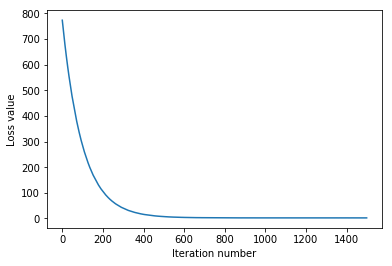

In [19]:
# A useful debugging strategy is to plot the loss as a function of
# iteration number:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

**Task 2.7** Write the `Softmax.predict` function and evaluate the performance on both the training and validation set.

In [20]:
y_train_pred = model.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = model.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.332184
validation accuracy: 0.344000


**Task 2.8:**

In [21]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of over 0.35 on the validation set.
from linear_classifier import Softmax
results = {}
best_val = -1
best_softmax = None
learning_rates = [1e-7, 5e-7]
regularization_strengths = [2.5e4, 5e4]

################################################################################
# TODO:                                                                        #
# Write code that chooses the best hyperparameters by tuning on the validation #
# set. For each combination of hyperparameters, train a linear model on the    #
# training set, compute its accuracy on the training and validation sets, and  #
# store these numbers in the results dictionary. In addition, store the best   #
# validation accuracy in best_val and the Softmax object that achieves this    #
# accuracy in best_softmax.                                                    #
#                                                                              #
# Hint: You should use a small value for num_iters as you develop your vali-   #
# dation code so that the models don't take much time to train; once you are   #
# confident that your validation code works, you should rerun the validation   #
# code with a larger value for num_iters.                                      #
################################################################################
for i in learning_rates:
    for j in regularization_strengths:
        # Define svm to use Softmax subclass
        svm = Softmax()
        # Train using the X_train & Y_train batch using iterative learing rates
        # and regularization bias
        svm.train(X_train,y_train,learning_rate=i,reg=j,num_iters=4000)
        # Predict the output for the training set
        y_pred = svm.predict(X_train)
        # Calculate the accuracy 
        train_accuracy = np.mean(y_train==y_pred)
        # Predict the output for the validation set 
        y_val_pred = svm.predict(X_val)
        # Calculate the accuracy
        val_accuracy = np.mean(y_val == y_val_pred)
        
        # Store the accuracies 
        results[(i,j)]=(train_accuracy,val_accuracy)
        
        # Check if the validate accuracy is larger than -1
        if best_val<val_accuracy:
            # If so, set validation accuracy is equal to best validation score
            best_val = val_accuracy
            # Set current svm as best softmax 
            best_softmax=svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.329673 val accuracy: 0.340000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.300816 val accuracy: 0.323000
lr 5.000000e-07 reg 2.500000e+04 train accuracy: 0.320510 val accuracy: 0.334000
lr 5.000000e-07 reg 5.000000e+04 train accuracy: 0.301061 val accuracy: 0.315000
best validation accuracy achieved during cross-validation: 0.340000


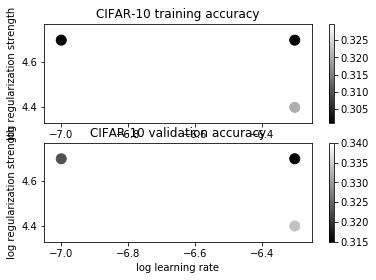

In [22]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [23]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: %f' % (test_accuracy, ))

softmax on raw pixels final test set accuracy: 0.334000


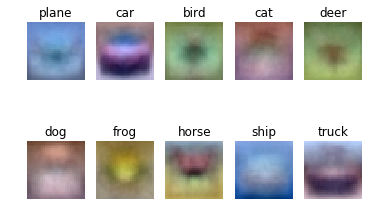

In [24]:
# Visualize the learned weights for each class
w = best_softmax.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

**Task 2.9** Describe what your visualized weights look like, and offer a brief explanation for why they look the way that they do.

**Your answer:** The first prominent feature of the visualized weights is that the ship and plane visualized weights look more blue in general, and this is due to the fact that both of these classes contain a high amount of the color blue (due to the sky and the ocean being in dominant in the pictures). The visualized weights for the car and truck are faily similar which also makes sense as the color distribution of such images would be more or less similar. The deer and bird have more green components which is expected if the training images were taken in the forest setting. The dog, cat and frog visualization are quite similar in appearance. Horses have distinct color distribution so they stand out quite a bit as well. 